In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
base = "/content/drive/MyDrive/FDS_project"
os.chdir(base)
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/MyDrive/FDS_project


In [6]:
import pandas as pd

file_path = "/content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv.txt"

df = pd.read_csv(file_path, sep="\t", dtype=str)
print("✅ File loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


✅ File loaded successfully!
Shape: (302, 25)
Columns: ['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Germline date last evaluated', 'Germline review status', 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status', 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24']


,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,NM_000492.4(CFTR):c.1A>G (p.Met1Val),CFTR,M1V,Cystic fibrosis,VCV000053423,7,117120149,7,117480095,53423,...,Pathogenic,"Mar 17, 2017",reviewed by expert panel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NM_000492.4(CFTR):c.2T>G (p.Met1Arg),CFTR,M1R,Cystic fibrosis,VCV000618930,7,117120150,7,117480096,618930,...,Pathogenic,"Nov 5, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NM_000492.4(CFTR):c.2T>C (p.Met1Thr),CFTR,M1T,Cystic fibrosis|Hereditary pancreatitis|Bronch...,VCV000053622,7,117120150,7,117480096,53622,...,Pathogenic,"Dec 18, 2024","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NM_000492.4(CFTR):c.2T>A (p.Met1Lys),CFTR,M1K,Cystic fibrosis,VCV000053621,7,117120150,7,117480096,53621,...,Pathogenic,"Jan 29, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NM_000492.4(CFTR):c.3G>A (p.Met1Ile),CFTR,M1I,Cystic fibrosis,VCV000053869,7,117120151,7,117480097,53869,...,Pathogenic,"Nov 5, 2018","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import os, pandas as pd, glob

BASE = "/content/drive/MyDrive/FDS_project"
RAW = os.path.join(BASE, "data_raw")
PROCESSED = os.path.join(BASE, "data_processed")
os.makedirs(PROCESSED, exist_ok=True)

# find ClinVar file
cands = glob.glob(os.path.join(RAW, "*clinvar*")) + glob.glob(os.path.join(RAW, "*clinvar*.*"))
if not cands:
    cands = glob.glob(os.path.join(RAW, "*"))
clinvar_path = cands[0]
print("Using:", clinvar_path)

df = pd.read_csv(clinvar_path, sep="\t", dtype=str)
print("Original rows:", df.shape[0])
print("Columns:", df.columns.tolist())


Using: /content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv.txt
Original rows: 302
Columns: ['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Germline date last evaluated', 'Germline review status', 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status', 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24']


In [8]:
# detect columns (adjusted robustly)
col_gene = next((c for c in df.columns if "gene" in c.lower()), None)
col_mol  = next((c for c in df.columns if "molecular" in c.lower() or "consequence" in c.lower()), None)
col_sign = next((c for c in df.columns if "clinical" in c.lower()), None)
col_prot = next((c for c in df.columns if "protein" in c.lower() and "change" in c.lower()), None)

print("Detected:", col_gene, col_mol, col_sign, col_prot)
assert col_gene and col_mol and col_sign and col_prot, "Missing expected columns — check df.columns."

# filter
df = df[df[col_gene].str.upper() == "CFTR"].copy()
df = df[df[col_mol].str.contains("missense", case=False, na=False)].copy()

# normalize and keep only clear labels
df[col_sign] = df[col_sign].str.replace(" ", "_", regex=False)
df = df[df[col_sign].isin(["Pathogenic","Likely_pathogenic","Benign","Likely_benign"])].copy()
df["Label"] = df[col_sign].apply(lambda x: "Pathogenic" if "Pathogenic" in x else "Benign")

print("After filters rows:", df.shape[0])
print(df[col_sign].value_counts())

# save cleaned
clean_path = os.path.join(PROCESSED, "clinvar_cftr_clean.csv")
df.to_csv(clean_path, index=False)
print("Saved clean file:", clean_path)


Detected: Gene(s) Molecular consequence Somatic clinical impact Protein change
After filters rows: 0
Series([], Name: count, dtype: int64)
Saved clean file: /content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_clean.csv


In [9]:
import re
import pandas as pd

# df already loaded and filtered to CFTR + missense + clear labels earlier
# If not, reload your cleaned df here:
# df = pd.read_csv("/content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_clean.csv", dtype=str)

# helper: find a p.* token (three-letter or one-letter AA forms)
PATTERNS = [
    r"p\.[A-Za-z]{3}\d+[A-Za-z]{3}",   # e.g., p.Arg117His
    r"p\.[A-Za-z]\d+[A-Za-z]"          # e.g., p.R117H
]

def extract_p_token_from_row(row):
    for col in row.index:
        val = row[col]
        if not isinstance(val, str):
            continue
        s = val.strip()
        # search both patterns
        for pat in PATTERNS:
            m = re.search(pat, s)
            if m:
                return m.group(0)  # return the matched token like "p.Arg117His"
    return None

# Try common columns first for speed; fall back to scanning all columns
common_cols = [c for c in df.columns if any(k in c.lower() for k in ["protein", "hgvs", "hgvsp", "name", "protein(s)"])]
if common_cols:
    # fast path: search these first
    df["_p_token"] = None
    for c in common_cols:
        mask = df["_p_token"].isna()
        hits = df.loc[mask, c].astype(str).str.extract("(" + "|".join(PATTERNS) + ")", flags=re.IGNORECASE, expand=False)
        df.loc[mask, "_p_token"] = hits
    # still missing? scan all columns
    df.loc[df["_p_token"].isna(), "_p_token"] = df[df["_p_token"].isna()].apply(extract_p_token_from_row, axis=1)
else:
    df["_p_token"] = df.apply(extract_p_token_from_row, axis=1)

print("Found protein HGVS tokens for:", df["_p_token"].notna().sum(), "rows out of", len(df))
print(df.loc[df["_p_token"].notna(), ["_p_token"]].head(10))


Found protein HGVS tokens for: 0 rows out of 0
Empty DataFrame
Columns: [_p_token]
Index: []


In [10]:
# Run this whole cell in Colab (after you loaded df earlier)
import re, pandas as pd, os, numpy as np

# if df not in memory, try to load the cleaned file saved earlier
if 'df' not in globals():
    cand = [
        "/content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_parsed.csv",
        "/content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_clean.csv",
        "/content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv.txt",
        "/content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv",
        "/content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.csv",
    ]
    for p in cand:
        if os.path.exists(p):
            try:
                df = pd.read_csv(p, sep='\t' if p.endswith('.tsv') or p.endswith('.txt') else ',', dtype=str)
            except Exception:
                df = pd.read_csv(p, dtype=str)
            print("Loaded", p)
            break

print("DataFrame loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\n--- First 5 rows (for quick visual) ---")
display(df.head(5))

# Regex patterns to search for
patterns = {
    "three_letter_p": re.compile(r"p\.\s*[A-Za-z]{3}\s*\d+\s*[A-Za-z]{3}"),
    "one_letter_p":   re.compile(r"p\.\s*[A-Za-z]\s*\d+\s*[A-Za-z]"),
    "three_letter_any": re.compile(r"[A-Za-z]{3}\s*\d+\s*[A-Za-z]{3}"),  # looser
    "one_letter_any": re.compile(r"\b[A-Z]\d{1,4}[A-Z]\b"),               # e.g., R117H
}

col_matches = {}
for col in df.columns:
    col_vals = df[col].astype(str).fillna("")
    # sample every row, but faster: build boolean mask if any match
    mask = np.zeros(len(col_vals), dtype=bool)
    matches = []
    for i, val in enumerate(col_vals):
        if patterns["three_letter_p"].search(val) or patterns["one_letter_p"].search(val) or patterns["one_letter_any"].search(val):
            mask[i] = True
            matches.append(val)
            if len(matches) >= 10:
                break
    if mask.any():
        col_matches[col] = {"count": int(mask.sum()), "examples": matches}

if not col_matches:
    print("\nNo obvious protein-change patterns found across any column using the common regexes.")
    print("Possible reasons: the protein-change is in an unexpected column name, encoded differently, or stored as NaN.")
    print("\nPlease paste here the printed `df.columns` (above) and the first 5 rows from the display above, or run the cell again and copy its output.")
else:
    print("\nColumns with detected protein-change patterns:")
    for c, info in col_matches.items():
        print(f" - {c}: {info['count']} rows matched; examples:")
        for ex in info['examples']:
            print("    ", ex)
    # choose the best column: highest count
    best_col = max(col_matches.keys(), key=lambda k: col_matches[k]["count"])
    print(f"\nUsing best-matching column: '{best_col}' (has {col_matches[best_col]['count']} matches).")
    # try to extract canonical 'p.Arg117His' or 'R117H' token from that column
    def extract_token(s):
        s = str(s)
        m = patterns["three_letter_p"].search(s)
        if m: return m.group(0).replace(" ", "")
        m = patterns["one_letter_p"].search(s)
        if m: return m.group(0).replace(" ", "")
        m = patterns["one_letter_any"].search(s)
        if m: return m.group(0)
        m = patterns["three_letter_any"].search(s)
        if m: return m.group(0).replace(" ", "")
        return None
    df['prot_str'] = df[best_col].astype(str).apply(extract_token)
    print("\nSample extracted tokens from best column:")
    print(df['prot_str'].dropna().unique()[:20])
    print("\nHow many non-null prot_str:", df['prot_str'].notna().sum(), "out of", len(df))
    # quick parse attempt (three->one & one-letter)
    three2one = {
     "Ala":"A","Arg":"R","Asn":"N","Asp":"D","Cys":"C",
     "Gln":"Q","Glu":"E","Gly":"G","His":"H","Ile":"I",
     "Leu":"L","Lys":"K","Met":"M","Phe":"F","Pro":"P",
     "Ser":"S","Thr":"T","Trp":"W","Tyr":"Y","Val":"V"
    }
    def parse_pc(s):
        if not isinstance(s,str): return (None,None,None)
        s = s.strip()
        if s.startswith("p."): s = s[2:]
        s = s.replace(" ", "")
        m = re.match(r"^([A-Za-z]{3})(\d+)([A-Za-z]{3})$", s)
        if m:
            a,b,c = m.groups()
            return (three2one.get(a.capitalize()), int(b), three2one.get(c.capitalize()))
        m = re.match(r"^([A-Za-z])(\d+)([A-Za-z])$", s)
        if m:
            a,b,c = m.groups()
            return (a.upper(), int(b), c.upper())
        return (None,None,None)
    parsed = df['prot_str'].apply(parse_pc)
    parsed_ok = [p for p in parsed if p[0] and p[1] and p[2]]
    print("Parsed OK count (from prot_str):", len(parsed_ok))
    if len(parsed_ok)>0:
        df[['ref_aa','pos','alt_aa']] = pd.DataFrame(parsed.tolist(), index=df.index)
        df2 = df.dropna(subset=['ref_aa','pos','alt_aa']).copy()
        df2['pos'] = df2['pos'].astype(int)
        print("Sample parsed rows:")
        display(df2[['prot_str','ref_aa','pos','alt_aa','Label']].head(10))
        outp = os.path.join("/content/drive/MyDrive/FDS_project/data_processed","clinvar_cftr_parsed_auto.csv")
        df2.to_csv(outp, index=False)
        print("Saved parsed CSV to:", outp)


DataFrame loaded. Shape: (0, 27)
Columns: ['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Germline date last evaluated', 'Germline review status', 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status', 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24', 'Label', '_p_token']

--- First 5 rows (for quick visual) ---


,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,Label,_p_token



No obvious protein-change patterns found across any column using the common regexes.
Possible reasons: the protein-change is in an unexpected column name, encoded differently, or stored as NaN.

Please paste here the printed `df.columns` (above) and the first 5 rows from the display above, or run the cell again and copy its output.


In [11]:
# Run this in Colab to find & inspect the RAW ClinVar file (don't overwrite anything)
import os, glob, pandas as pd

BASE = "/content/drive/MyDrive/FDS_project"
RAW = os.path.join(BASE, "data_raw")
print("Listing files in:", RAW)
print(glob.glob(os.path.join(RAW, "*")))

# Try to pick a raw file (prefer ones with 'clinvar' or 'variant_summary')
cands = glob.glob(os.path.join(RAW, "*clinvar*")) + glob.glob(os.path.join(RAW, "*variant_summary*")) + glob.glob(os.path.join(RAW, "*"))
if not cands:
    raise FileNotFoundError(f"No files found in {RAW}. Please upload the original ClinVar TSV here.")
raw_path = cands[0]
print("\nLoading file:", raw_path)

# Try reading with tab separator first, then fallback to comma
try:
    df_raw = pd.read_csv(raw_path, sep='\t', dtype=str)
except Exception:
    df_raw = pd.read_csv(raw_path, dtype=str)

print("\nRaw shape:", df_raw.shape)
print("Columns:", df_raw.columns.tolist())
print("\n--- First 20 rows (visual inspect) ---")
display(df_raw.head(20))

# Show counts / unique values for likely key columns (if present)
for col in ['Protein change','Protein_change','ProteinChange','Molecular consequence','MolecularConsequence','Molecular consequence(s)','Clinical significance','ClinicalSignificance','Germline classification','Label']:
    if col in df_raw.columns:
        print(f"\nColumn: {col}  — unique count: {df_raw[col].nunique(dropna=False)}")
        print(df_raw[col].value_counts(dropna=False).head(20))


Listing files in: /content/drive/MyDrive/FDS_project/data_raw
['/content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv.txt']

Loading file: /content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv.txt

Raw shape: (302, 25)
Columns: ['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession', 'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID', 'Canonical SPDI', 'Variant type', 'Molecular consequence', 'Germline classification', 'Germline date last evaluated', 'Germline review status', 'Somatic clinical impact', 'Somatic clinical impact date last evaluated', 'Somatic clinical impact review status', 'Oncogenicity classification', 'Oncogenicity date last evaluated', 'Oncogenicity review status', 'Unnamed: 24']

--- First 20 rows (visual inspect) ---


,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline classification,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24
0,NM_000492.4(CFTR):c.1A>G (p.Met1Val),CFTR,M1V,Cystic fibrosis,VCV000053423,7,117120149,7,117480095,53423,...,Pathogenic,"Mar 17, 2017",reviewed by expert panel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NM_000492.4(CFTR):c.2T>G (p.Met1Arg),CFTR,M1R,Cystic fibrosis,VCV000618930,7,117120150,7,117480096,618930,...,Pathogenic,"Nov 5, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NM_000492.4(CFTR):c.2T>C (p.Met1Thr),CFTR,M1T,Cystic fibrosis|Hereditary pancreatitis|Bronch...,VCV000053622,7,117120150,7,117480096,53622,...,Pathogenic,"Dec 18, 2024","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NM_000492.4(CFTR):c.2T>A (p.Met1Lys),CFTR,M1K,Cystic fibrosis,VCV000053621,7,117120150,7,117480096,53621,...,Pathogenic,"Jan 29, 2018","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NM_000492.4(CFTR):c.3G>A (p.Met1Ile),CFTR,M1I,Cystic fibrosis,VCV000053869,7,117120151,7,117480097,53869,...,Pathogenic,"Nov 5, 2018","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NM_000492.4(CFTR):c.[4C>T;7A>T],CFTR,"Q2*, R3W",Cystic fibrosis,VCV001320029,7|7,117120152,7|7,117480098,1320029,...,Pathogenic,"Sep 24, 2021",reviewed by expert panel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NM_000492.4(CFTR):c.13C>T (p.Pro5Ser),CFTR,P5S,Cystic fibrosis,VCV002913712,7,117120161,7,117480107,2913712,...,Likely pathogenic,"Sep 21, 2023","criteria provided, single submitter",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NM_000492.4(CFTR):c.14C>T (p.Pro5Leu),CFTR,P5L,CFTR-related disorder|Cystic fibrosis|Congenit...,VCV000035824,7,117120162,7,117480108,35824,...,Pathogenic/Likely pathogenic,"Mar 25, 2025","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NM_000492.4(CFTR):c.38C>T (p.Ser13Phe),CFTR,S13F,Cystic fibrosis,VCV000053845,7,117120186,7,117480132,53845,...,Pathogenic,"Aug 31, 2018",reviewed by expert panel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NM_000492.4(CFTR):c.44T>C (p.Leu15Pro),CFTR,L15P,Cystic fibrosis,VCV000634833,7,117120192,7,117480138,634833,...,Pathogenic,"Aug 31, 2018",reviewed by expert panel,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Column: Protein change  — unique count: 282
Protein change
NaN       10
F311L      3
S549R      3
E403D      2
G1249R     2
W1098C     2
R117H      2
R560S      2
G628R      2
G178R      2
S756N      1
F693L      1
D648V      1
I618T      1
A613T      1
H609R      1
T604I      1
T604A      1
I601T      1
I601F      1
Name: count, dtype: int64

Column: Molecular consequence  — unique count: 5
Molecular consequence
missense variant                            292
missense variant|initiator_codon_variant      5
nonsense|missense variant                     3
missense variant|intron variant               1
inframe_deletion|missense variant             1
Name: count, dtype: int64

Column: Germline classification  — unique count: 6
Germline classification
Pathogenic                      138
Likely pathogenic                91
Pathogenic/Likely pathogenic     42
Pathogenic; drug response        17
Likely benign                    11
Benign/Likely benign              3
Name: count, dtype: int6

In [12]:
# === Parse Protein change & map labels (run this cell) ===
import os, glob, re, pandas as pd

BASE = "/content/drive/MyDrive/FDS_project"
RAW = os.path.join(BASE, "data_raw")
PROCESSED = os.path.join(BASE, "data_processed")
os.makedirs(PROCESSED, exist_ok=True)

# locate raw file
cands = glob.glob(os.path.join(RAW, "*clinvar*")) + glob.glob(os.path.join(RAW, "*"))
raw_path = cands[0]
print("Loading:", raw_path)

# load (tsv or csv)
try:
    df_raw = pd.read_csv(raw_path, sep='\t', dtype=str)
except Exception:
    df_raw = pd.read_csv(raw_path, dtype=str)

print("Original rows:", df_raw.shape[0])

# Column names observed from your inspection:
prot_col = "Protein change"          # contains tokens like F311L, R117H, etc.
mol_col  = "Molecular consequence"   # contains 'missense variant' etc.
label_col = "Germline classification"  # use this as label source

# 1) Filter: CFTR gene (should already be CFTR dataset) and missense consequences
df = df_raw.copy()
if 'Gene(s)' in df.columns:
    df = df[df['Gene(s)'].str.upper() == 'CFTR'].copy()

df = df[df[mol_col].str.contains("missense", case=False, na=False)].copy()
print("After keeping missense rows:", df.shape[0])

# 2) Map Germline classification -> two classes (Pathogenic/Benign)
# We'll treat anything containing 'Pathogenic' as pathogenic, and anything containing 'Benign' as benign.
def map_label(x):
    if pd.isna(x): return None
    s = str(x)
    if "Pathogenic" in s:
        return "Pathogenic"
    if "Benign" in s:
        return "Benign"
    return None

df['Label'] = df[label_col].apply(map_label)
print("Rows with mapped labels (non-null):", df['Label'].notna().sum())

# 3) Parse Protein change tokens like F311L or p.F311L or NP_:p.F311L etc.
def extract_simple_token(x):
    if pd.isna(x): return None
    s = str(x)
    # try to find substring like p.F311L or F311L or R117H (one-letter tokens)
    # pattern: optional p. or anything, then single-letter, digits, single-letter
    m = re.search(r'([A-Za-z])\s*(\d{1,5})\s*([A-Za-z])', s)
    if m:
        ref,pos,alt = m.groups()
        # ensure single letters are uppercase and digits to int
        return f"{ref.upper()}{pos}{alt.upper()}"
    return None

df['prot_token'] = df[prot_col].apply(extract_simple_token)

# 4) Parse token into ref,pos,alt
def parse_token(tok):
    if pd.isna(tok): return (None,None,None)
    m = re.match(r'^([A-Z])(\d{1,5})([A-Z])$', tok)
    if not m:
        return (None,None,None)
    ref, pos, alt = m.groups()
    return (ref, int(pos), alt)

parsed = df['prot_token'].apply(parse_token)
parsed_df = pd.DataFrame(parsed.tolist(), index=df.index, columns=['ref_aa','pos','alt_aa'])
df = pd.concat([df, parsed_df], axis=1)

# 5) Keep only rows with parsed tokens and mapped labels
before = df.shape[0]
df = df[df['ref_aa'].notna() & df['pos'].notna() & df['alt_aa'].notna() & df['Label'].notna()].copy()
after = df.shape[0]
print(f"Kept {after} / {before} rows after parsing tokens & labels.")

# 6) Sanity checks and quick view
print("\nLabel counts:")
print(df['Label'].value_counts())
print("\nSample parsed rows:")
display(df[['prot_token','ref_aa','pos','alt_aa','Label']].head(15))

# 7) Save parsed CSV (ML-ready intermediate)
out_path = os.path.join(PROCESSED, "clinvar_cftr_parsed.csv")
df.to_csv(out_path, index=False)
print("\nSaved parsed file to:", out_path)


Loading: /content/drive/MyDrive/FDS_project/data_raw/clinvar_cftr.tsv.txt
Original rows: 302
After keeping missense rows: 151
Rows with mapped labels (non-null): 109
Kept 108 / 151 rows after parsing tokens & labels.

Label counts:
Label
Pathogenic    108
Name: count, dtype: int64

Sample parsed rows:


,prot_token,ref_aa,pos,alt_aa,Label
0,M1V,M,1.0,V,Pathogenic
1,M1R,M,1.0,R,Pathogenic
2,M1T,M,1.0,T,Pathogenic
3,M1K,M,1.0,K,Pathogenic
4,M1I,M,1.0,I,Pathogenic
5,R3W,R,3.0,W,Pathogenic
7,P5L,P,5.0,L,Pathogenic
8,S13F,S,13.0,F,Pathogenic
9,L15P,L,15.0,P,Pathogenic
11,G27R,G,27.0,R,Pathogenic



Saved parsed file to: /content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_parsed.csv


In [13]:
import os, re, pandas as pd

BASE = "/content/drive/MyDrive/FDS_project"
RAW = os.path.join(BASE, "data_raw")
PROCESSED = os.path.join(BASE, "data_processed")

raw_path = os.path.join(RAW, "clinvar_cftr.tsv.txt")
df = pd.read_csv(raw_path, sep="\t", dtype=str)

prot_col = "Protein change"
mol_col = "Molecular consequence"
label_col = "Germline classification"

# Filter missense variants only
df = df[df[mol_col].str.contains("missense", case=False, na=False)].copy()

# Map broader label categories
def map_label(x):
    if pd.isna(x): return None
    s = str(x)
    if any(k in s for k in ["Pathogenic", "pathogenic"]):
        return "Pathogenic"
    if any(k in s for k in ["Benign", "benign"]):
        return "Benign"
    return None

df["Label"] = df[label_col].apply(map_label)

# Parse protein change tokens (like F311L, R117H)
def parse_token(s):
    if pd.isna(s): return (None,None,None)
    s = str(s)
    m = re.search(r"([A-Za-z])(\d+)([A-Za-z])", s)
    if m:
        a,b,c = m.groups()
        return (a.upper(), int(b), c.upper())
    return (None,None,None)

df["ref_aa"], df["pos"], df["alt_aa"] = zip(*df[prot_col].apply(parse_token))

df = df.dropna(subset=["ref_aa","pos","alt_aa","Label"])
df["pos"] = df["pos"].astype(int)

print("Label counts after parsing:")
print(df["Label"].value_counts())
print("Total parsed variants:", len(df))

out_path = os.path.join(PROCESSED, "clinvar_cftr_parsed_balanced.csv")
df.to_csv(out_path, index=False)
print("\n✅ Saved balanced parsed dataset to:", out_path)


Label counts after parsing:
Label
Pathogenic    278
Benign         14
Name: count, dtype: int64
Total parsed variants: 292

✅ Saved balanced parsed dataset to: /content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_parsed_balanced.csv


In [14]:
# === Feature generation: build cftr_ml_table.csv ===
import os, glob, requests, math
import pandas as pd

BASE = "/content/drive/MyDrive/FDS_project"
PROCESSED = os.path.join(BASE, "data_processed")
os.makedirs(PROCESSED, exist_ok=True)

# 1) Load parsed variants (prefer balanced file if present)
candidates = [
    os.path.join(PROCESSED, "clinvar_cftr_parsed_balanced.csv"),
    os.path.join(PROCESSED, "clinvar_cftr_parsed.csv"),
    os.path.join(PROCESSED, "clinvar_cftr_parsed_auto.csv"),
    os.path.join(PROCESSED, "clinvar_cftr_parsed.csv")
]
parsed_path = next((p for p in candidates if os.path.exists(p)), None)
if parsed_path is None:
    # fallback: search processed folder for parsed-like files
    files = glob.glob(os.path.join(PROCESSED, "*parsed*.csv"))
    if files:
        parsed_path = files[0]
if parsed_path is None:
    raise FileNotFoundError("No parsed ClinVar CSV found in data_processed/. Please run parsing step first.")

print("Using parsed variants file:", parsed_path)
df = pd.read_csv(parsed_path, dtype=str)
# Ensure numeric pos
df = df.copy()
df['pos'] = df['pos'].astype(float).astype(int)
print("Parsed rows:", len(df))

# 2) Fetch UniProt CFTR (P13569) entry (REST) to get sequence & features
uniprot_id = "P13569"
print("Downloading UniProt entry for", uniprot_id, "...")
# Try UniProt REST plain text or JSON endpoint
seq = None
features = []
try:
    # JSON endpoint (may require internet from Colab)
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}"
    r = requests.get(url, headers={"Accept": "application/json"})
    r.raise_for_status()
    data = r.json()
    # sequence is nested: data['sequence']['value']
    seq = data.get('sequence', {}).get('value')
    features = data.get('features', []) or []
except Exception:
    # fallback: fasta text
    try:
        r2 = requests.get(f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.fasta")
        r2.raise_for_status()
        fasta = r2.text
        # parse fasta
        seq = "".join(line.strip() for line in fasta.splitlines() if not line.startswith(">"))
        features = []
    except Exception as e:
        raise RuntimeError("Failed to fetch UniProt entry; check internet or UniProt endpoint.") from e

if not seq:
    raise RuntimeError("Could not retrieve sequence from UniProt.")
seq_len = len(seq)
print("Sequence length:", seq_len, "aa")
# 3) Extract domain & transmembrane intervals from features
tm_intervals = []
domain_intervals = []
for feat in features:
    # Feature objects from UniProt JSON include keys like 'type' and 'location'
    t = (feat.get('type') or "").lower()
    desc = (feat.get('description') or "").lower()
    loc = feat.get('location') or {}
    # location object might have 'start'/'end' as dicts with 'value'
    start = None; end = None
    if isinstance(loc, dict):
        # try 'start' / 'end' keys
        s = loc.get('start') or {}
        e = loc.get('end') or {}
        try:
            start = int(s.get('value'))
            end = int(e.get('value'))
        except Exception:
            start = None; end = None
    # If no start/end but 'position' present, skip
    if start and end:
        if 'transmembrane' in t or 'transmembrane' in desc or 'transmembrane' in feat.get('type','').lower() or 'helix' in t:
            tm_intervals.append((start, end))
        if 'domain' in t or 'domain' in desc:
            domain_intervals.append((start, end))

# If JSON features empty, try basic heuristic for TM/domain via text search in flat entry (less reliable)
if not tm_intervals and not domain_intervals:
    print("UniProt features not found or empty; proceeding without domain/TM annotation (in_tm/in_domain set to 0).")

# Helper: check if position in any interval list
def in_intervals(pos, intervals):
    for a,b in intervals:
        if a <= pos <= b:
            return True
    return False

# 4) Biochemical tables: BLOSUM62, Grantham, Kyte-Doolittle, Charge
# BLOSUM62 matrix (dict of dicts) - small compressed representation included
BLOSUM62 = {
"A": {"A":4,"R":-1,"N":-2,"D":-2,"C":0,"Q":-1,"E":-1,"G":0,"H":-2,"I":-1,"L":-1,"K":-1,"M":-1,"F":-2,"P":-1,"S":1,"T":0,"W":-3,"Y":-2,"V":0},
"R": {"A":-1,"R":5,"N":0,"D":-2,"C":-3,"Q":1,"E":0,"G":-2,"H":0,"I":-3,"L":-2,"K":2,"M":-1,"F":-3,"P":-2,"S":-1,"T":-1,"W":-3,"Y":-2,"V":-3},
"N": {"A":-2,"R":0,"N":6,"D":1,"C":-3,"Q":0,"E":0,"G":0,"H":1,"I":-3,"L":-3,"K":0,"M":-2,"F":-3,"P":-2,"S":1,"T":0,"W":-4,"Y":-2,"V":-3},
"D": {"A":-2,"R":-2,"N":1,"D":6,"C":-3,"Q":0,"E":2,"G":-1,"H":-1,"I":-3,"L":-4,"K":-1,"M":-3,"F":-3,"P":-1,"S":0,"T":-1,"W":-4,"Y":-3,"V":-3},
"C": {"A":0,"R":-3,"N":-3,"D":-3,"C":9,"Q":-3,"E":-4,"G":-3,"H":-3,"I":-1,"L":-1,"K":-3,"M":-1,"F":-2,"P":-3,"S":-1,"T":-1,"W":-2,"Y":-2,"V":-1},
"Q": {"A":-1,"R":1,"N":0,"D":0,"C":-3,"Q":5,"E":2,"G":-2,"H":0,"I":-3,"L":-2,"K":1,"M":0,"F":-3,"P":-1,"S":0,"T":-1,"W":-2,"Y":-1,"V":-2},
"E": {"A":-1,"R":0,"N":0,"D":2,"C":-4,"Q":2,"E":5,"G":-2,"H":0,"I":-3,"L":-3,"K":1,"M":-2,"F":-3,"P":-1,"S":0,"T":-1,"W":-3,"Y":-2,"V":-2},
"G": {"A":0,"R":-2,"N":0,"D":-1,"C":-3,"Q":-2,"E":-2,"G":6,"H":-2,"I":-4,"L":-4,"K":-2,"M":-3,"F":-3,"P":-2,"S":0,"T":-2,"W":-2,"Y":-3,"V":-3},
"H": {"A":-2,"R":0,"N":1,"D":-1,"C":-3,"Q":0,"E":0,"G":-2,"H":8,"I":-3,"L":-3,"K":-1,"M":-2,"F":-1,"P":-2,"S":-1,"T":-2,"W":-2,"Y":2,"V":-3},
"I": {"A":-1,"R":-3,"N":-3,"D":-3,"C":-1,"Q":-3,"E":-3,"G":-4,"H":-3,"I":4,"L":2,"K":-3,"M":1,"F":0,"P":-3,"S":-2,"T":-1,"W":-3,"Y":-1,"V":3},
"L": {"A":-1,"R":-2,"N":-3,"D":-4,"C":-1,"Q":-2,"E":-3,"G":-4,"H":-3,"I":2,"L":4,"K":-2,"M":2,"F":0,"P":-3,"S":-2,"T":-1,"W":-2,"Y":-1,"V":1},
"K": {"A":-1,"R":2,"N":0,"D":-1,"C":-3,"Q":1,"E":1,"G":-2,"H":-1,"I":-3,"L":-2,"K":5,"M":-1,"F":-3,"P":-1,"S":0,"T":-1,"W":-3,"Y":-2,"V":-2},
"M": {"A":-1,"R":-1,"N":-2,"D":-3,"C":-1,"Q":0,"E":-2,"G":-3,"H":-2,"I":1,"L":2,"K":-1,"M":5,"F":0,"P":-2,"S":-1,"T":-1,"W":-1,"Y":-1,"V":1},
"F": {"A":-2,"R":-3,"N":-3,"D":-3,"C":-2,"Q":-3,"E":-3,"G":-3,"H":-1,"I":0,"L":0,"K":-3,"M":0,"F":6,"P":-4,"S":-2,"T":-2,"W":1,"Y":3,"V":-1},
"P": {"A":-1,"R":-2,"N":-2,"D":-1,"C":-3,"Q":-1,"E":-1,"G":-2,"H":-2,"I":-3,"L":-3,"K":-1,"M":-2,"F":-4,"P":7,"S":-1,"T":-1,"W":-4,"Y":-3,"V":-2},
"S": {"A":1,"R":-1,"N":1,"D":0,"C":-1,"Q":0,"E":0,"G":0,"H":-1,"I":-2,"L":-2,"K":0,"M":-1,"F":-2,"P":-1,"S":4,"T":1,"W":-3,"Y":-2,"V":-2},
"T": {"A":0,"R":-1,"N":0,"D":-1,"C":-1,"Q":-1,"E":-1,"G":-2,"H":-2,"I":-1,"L":-1,"K":-1,"M":-1,"F":-2,"P":-1,"S":1,"T":5,"W":-2,"Y":-2,"V":0},
"W": {"A":-3,"R":-3,"N":-4,"D":-4,"C":-2,"Q":-2,"E":-3,"G":-2,"H":-2,"I":-3,"L":-2,"K":-3,"M":-1,"F":1,"P":-4,"S":-3,"T":-2,"W":11,"Y":2,"V":-3},
"Y": {"A":-2,"R":-2,"N":-2,"D":-3,"C":-2,"Q":-1,"E":-2,"G":-3,"H":2,"I":-1,"L":-1,"K":-2,"M":-1,"F":3,"P":-3,"S":-2,"T":-2,"W":2,"Y":7,"V":-1},
"V": {"A":0,"R":-3,"N":-3,"D":-3,"C":-1,"Q":-2,"E":-2,"G":-3,"H":-3,"I":3,"L":1,"K":-2,"M":1,"F":-1,"P":-2,"S":-2,"T":0,"W":-3,"Y":-1,"V":4},
}

# Grantham distances (pairwise) - we'll use dictionary distance lookup for common pairs
# (We'll include a minimal map by AA->score to average formula via table; using standard Grantham matrix)
GRANTHAM = {
 'A':{'A':0,'R':112,'N':111,'D':126,'C':195,'Q':91,'E':107,'G':60,'H':86,'I':94,'L':96,'K':106,'M':84,'F':113,'P':27,'S':99,'T':58,'W':148,'Y':112,'V':64},
 'R':{'A':112,'R':0,'N':86,'D':96,'C':180,'Q':43,'E':54,'G':125,'H':29,'I':97,'L':102,'K':26,'M':91,'F':97,'P':103,'S':110,'T':71,'W':101,'Y':77,'V':96},
 'N':{'A':111,'R':86,'N':0,'D':23,'C':139,'Q':46,'E':42,'G':80,'H':68,'I':149,'L':153,'K':94,'M':142,'F':158,'P':91,'S':46,'T':65,'W':174,'Y':143,'V':133},
 'D':{'A':126,'R':96,'N':23,'D':0,'C':154,'Q':61,'E':45,'G':94,'H':81,'I':168,'L':172,'K':101,'M':160,'F':177,'P':108,'S':65,'T':85,'W':181,'Y':160,'V':152},
 'C':{'A':195,'R':180,'N':139,'D':154,'C':0,'Q':154,'E':170,'G':159,'H':174,'I':198,'L':198,'K':202,'M':196,'F':205,'P':169,'S':112,'T':149,'W':215,'Y':194,'V':192},
 'Q':{'A':91,'R':43,'N':46,'D':61,'C':154,'Q':0,'E':29,'G':87,'H':24,'I':109,'L':113,'K':53,'M':101,'F':116,'P':76,'S':68,'T':42,'W':130,'Y':99,'V':96},
 'E':{'A':107,'R':54,'N':42,'D':45,'C':170,'Q':29,'E':0,'G':98,'H':40,'I':134,'L':138,'K':56,'M':126,'F':140,'P':93,'S':80,'T':65,'W':152,'Y':122,'V':121},
 'G':{'A':60,'R':125,'N':80,'D':94,'C':159,'Q':87,'E':98,'G':0,'H':98,'I':135,'L':138,'K':127,'M':127,'F':153,'P':42,'S':56,'T':59,'W':184,'Y':147,'V':109},
 'H':{'A':86,'R':29,'N':68,'D':81,'C':174,'Q':24,'E':40,'G':98,'H':0,'I':121,'L':124,'K':32,'M':91,'F':100,'P':77,'S':89,'T':47,'W':115,'Y':83,'V':84},
 'I':{'A':94,'R':97,'N':149,'D':168,'C':198,'Q':109,'E':134,'G':135,'H':121,'I':0,'L':5,'K':102,'M':10,'F':21,'P':95,'S':142,'T':89,'W':61,'Y':33,'V':29},
 'L':{'A':96,'R':102,'N':153,'D':172,'C':198,'Q':113,'E':138,'G':138,'H':124,'I':5,'L':0,'K':107,'M':15,'F':22,'P':98,'S':145,'T':92,'W':61,'Y':36,'V':32},
 'K':{'A':106,'R':26,'N':94,'D':101,'C':202,'Q':53,'E':56,'G':127,'H':32,'I':102,'L':107,'K':0,'M':95,'F':102,'P':103,'S':121,'T':78,'W':110,'Y':85,'V':97},
 'M':{'A':84,'R':91,'N':142,'D':160,'C':196,'Q':101,'E':126,'G':127,'H':91,'I':10,'L':15,'K':95,'M':0,'F':28,'P':87,'S':135,'T':81,'W':67,'Y':36,'V':21},
 'F':{'A':113,'R':97,'N':158,'D':177,'C':205,'Q':116,'E':140,'G':153,'H':100,'I':21,'L':22,'K':102,'M':28,'F':0,'P':114,'S':155,'T':103,'W':40,'Y':22,'V':50},
 'P':{'A':27,'R':103,'N':91,'D':108,'C':169,'Q':76,'E':93,'G':42,'H':77,'I':95,'L':98,'K':103,'M':87,'F':114,'P':0,'S':74,'T':38,'W':147,'Y':110,'V':68},
 'S':{'A':99,'R':110,'N':46,'D':65,'C':112,'Q':68,'E':80,'G':56,'H':89,'I':142,'L':145,'K':121,'M':135,'F':155,'P':74,'S':0,'T':58,'W':177,'Y':144,'V':124},
 'T':{'A':58,'R':71,'N':65,'D':85,'C':149,'Q':42,'E':65,'G':59,'H':47,'I':89,'L':92,'K':78,'M':81,'F':103,'P':38,'S':58,'T':0,'W':128,'Y':92,'V':69},
 'W':{'A':148,'R':101,'N':174,'D':181,'C':215,'Q':130,'E':152,'G':184,'H':115,'I':61,'L':61,'K':110,'M':67,'F':40,'P':147,'S':177,'T':128,'W':0,'Y':37,'V':88},
 'Y':{'A':112,'R':77,'N':143,'D':160,'C':194,'Q':99,'E':122,'G':147,'H':83,'I':33,'L':36,'K':85,'M':36,'F':22,'P':110,'S':144,'T':92,'W':37,'Y':0,'V':55},
 'V':{'A':64,'R':96,'N':133,'D':152,'C':192,'Q':96,'E':121,'G':109,'H':84,'I':29,'L':32,'K':97,'M':21,'F':50,'P':68,'S':124,'T':69,'W':88,'Y':55,'V':0}
}

# Kyte-Doolittle hydropathy index
HYDRO = {'A':1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C':2.5,'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I':4.5,
         'L':3.8,'K':-3.9,'M':1.9,'F':2.8,'P':-1.6,'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V':4.2}

# Charge mapping (simple): positive +1 (K,R,H), negative -1 (D,E), neutral 0
CHARGE = { 'K':1,'R':1,'H':1,'D':-1,'E':-1,
           'A':0,'N':0,'C':0,'Q':0,'G':0,'I':0,'L':0,'M':0,'F':0,'P':0,'S':0,'T':0,'W':0,'Y':0,'V':0}

# 5) Compute features row-wise
records = []
for _, row in df.iterrows():
    ref = str(row['ref_aa']).upper()
    alt = str(row['alt_aa']).upper()
    pos = int(row['pos'])
    label = row.get('Label')  # 'Pathogenic' or 'Benign'

    # norm_pos
    norm_pos = pos / seq_len

    # in_tm / in_domain
    in_tm = int(in_intervals(pos, tm_intervals)) if tm_intervals else 0
    in_domain = int(in_intervals(pos, domain_intervals)) if domain_intervals else 0

    # blosum62 (fallback 0 if unknown)
    blos = None
    if ref in BLOSUM62 and alt in BLOSUM62[ref]:
        blos = BLOSUM62[ref][alt]
    else:
        blos = 0

    # grantham distance (symmetric)
    gran = None
    try:
        gran = GRANTHAM[ref][alt]
    except Exception:
        # try reversed
        try:
            gran = GRANTHAM[alt][ref]
        except Exception:
            gran = None
    if gran is None:
        gran = -1  # sentinel for unknown

    # hydropathy diff
    hydro_diff = None
    if ref in HYDRO and alt in HYDRO:
        hydro_diff = HYDRO.get(alt, 0.0) - HYDRO.get(ref, 0.0)
    else:
        hydro_diff = 0.0

    # charge change
    charge_change = CHARGE.get(alt, 0) - CHARGE.get(ref, 0)

    records.append({
        'ref_aa': ref,
        'alt_aa': alt,
        'pos': pos,
        'norm_pos': norm_pos,
        'blosum62': blos,
        'grantham': gran,
        'hydro_diff': hydro_diff,
        'charge_change': charge_change,
        'in_tm': in_tm,
        'in_domain': in_domain,
        'Label': label
    })

ml_df = pd.DataFrame(records)
out_path = os.path.join(PROCESSED, "cftr_ml_table.csv")
ml_df.to_csv(out_path, index=False)
print("Saved ML-ready table to:", out_path)
print("\nDataset shape:", ml_df.shape)
print("\nLabel counts:")
print(ml_df['Label'].value_counts())
print("\nSample rows:")
display(ml_df.head(12))


Using parsed variants file: /content/drive/MyDrive/FDS_project/data_processed/clinvar_cftr_parsed_balanced.csv
Parsed rows: 292
Sequence length: 1480 aa
Saved ML-ready table to: /content/drive/MyDrive/FDS_project/data_processed/cftr_ml_table.csv

Dataset shape: (292, 11)

Label counts:
Label
Pathogenic    278
Benign         14
Name: count, dtype: int64

Sample rows:


,ref_aa,alt_aa,pos,norm_pos,blosum62,grantham,hydro_diff,charge_change,in_tm,in_domain,Label
0,M,V,1,0.000676,1,21,2.3,0,1,1,Pathogenic
1,M,R,1,0.000676,-1,91,-6.4,1,1,1,Pathogenic
2,M,T,1,0.000676,-1,81,-2.6,0,1,1,Pathogenic
3,M,K,1,0.000676,-1,95,-5.8,1,1,1,Pathogenic
4,M,I,1,0.000676,1,10,2.6,0,1,1,Pathogenic
5,R,W,3,0.002027,-3,101,3.6,-1,1,1,Pathogenic
6,P,S,5,0.003378,-1,74,0.8,0,1,1,Pathogenic
7,P,L,5,0.003378,-3,98,5.4,0,1,1,Pathogenic
8,S,F,13,0.008784,-2,155,3.6,0,1,1,Pathogenic
9,L,P,15,0.010135,-3,98,-5.4,0,1,1,Pathogenic


Before SMOTE: [ 11 222]
After SMOTE: [222 222]

=== Logistic Regression ===
Accuracy: 0.797
              precision    recall  f1-score   support

      Benign      0.200     1.000     0.333         3
  Pathogenic      1.000     0.786     0.880        56

    accuracy                          0.797        59
   macro avg      0.600     0.893     0.607        59
weighted avg      0.959     0.797     0.852        59



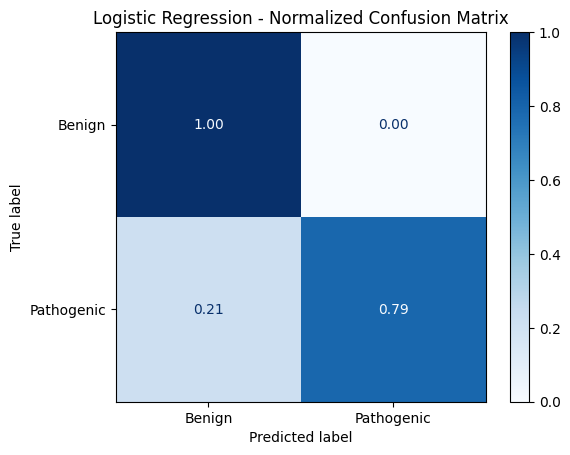


=== Decision Tree ===
Accuracy: 0.915
              precision    recall  f1-score   support

      Benign      0.333     0.667     0.444         3
  Pathogenic      0.981     0.929     0.954        56

    accuracy                          0.915        59
   macro avg      0.657     0.798     0.699        59
weighted avg      0.948     0.915     0.928        59



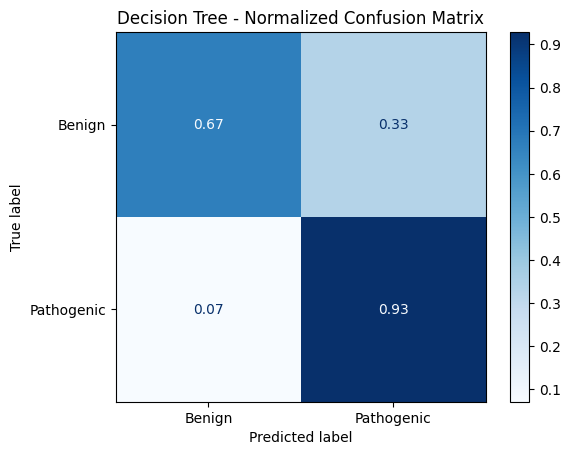


=== KNN ===
Accuracy: 0.915
              precision    recall  f1-score   support

      Benign      0.375     1.000     0.545         3
  Pathogenic      1.000     0.911     0.953        56

    accuracy                          0.915        59
   macro avg      0.688     0.955     0.749        59
weighted avg      0.968     0.915     0.933        59



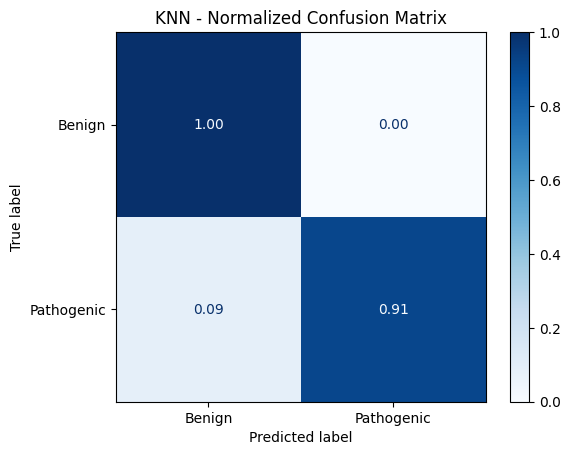

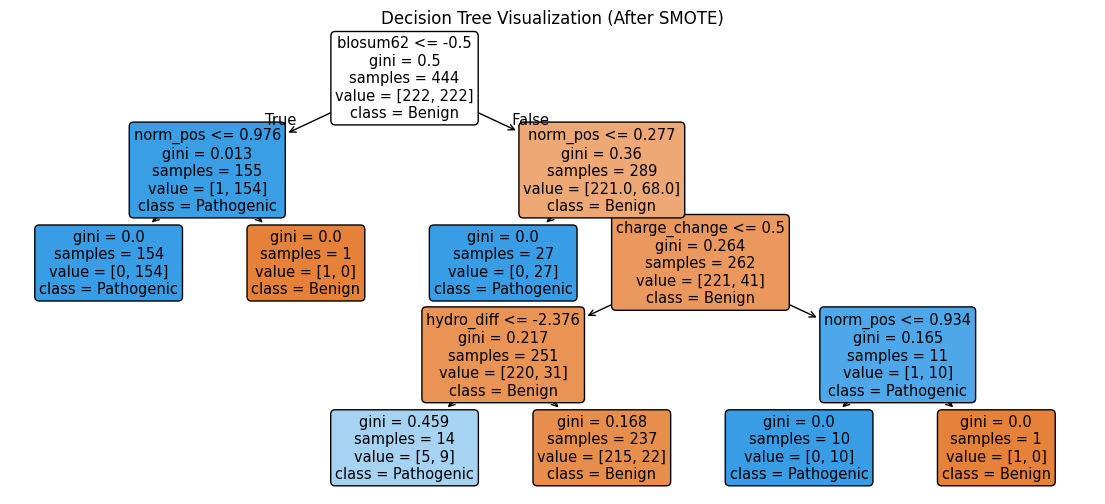

In [15]:
# === Model training with SMOTE balancing ===
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1) Load ML-ready dataset
ml_path = "/content/drive/MyDrive/FDS_project/data_processed/cftr_ml_table.csv"
df = pd.read_csv(ml_path)

# Encode labels
df['Label'] = df['Label'].map({'Pathogenic':1, 'Benign':0})

# Define features and target
feature_cols = ['norm_pos','blosum62','grantham','hydro_diff','charge_change','in_tm','in_domain']
X = df[feature_cols]
y = df['Label']

# 2) Split into train/test BEFORE balancing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3) Apply SMOTE only on training set
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))

# 4) Scale features (helps Logistic Regression & KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# 5) Train models

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_bal)
y_pred_knn = knn.predict(X_test_scaled)

# 6) Evaluate models
models = {'Logistic Regression': y_pred_lr, 'Decision Tree': y_pred_dt, 'KNN': y_pred_knn}

for name, preds in models.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(y_test, preds), 3))
    print(classification_report(y_test, preds, target_names=['Benign','Pathogenic'], digits=3))

    cm = confusion_matrix(y_test, preds, labels=[0,1], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Pathogenic'])
    disp.plot(cmap='Blues', values_format=".2f")
    plt.title(f"{name} - Normalized Confusion Matrix")
    plt.show()

# 7) Decision Tree visualization
plt.figure(figsize=(14,6))
plot_tree(dt, feature_names=feature_cols, class_names=['Benign','Pathogenic'], filled=True, rounded=True)
plt.title("Decision Tree Visualization (After SMOTE)")
plt.show()

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

pipe = Pipeline([('smote', smote), ('model', dt)])
scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy') # Changed scoring to accuracy
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean()) # Changed print statement

Cross-validated accuracy scores: [0.88135593 0.89830508 0.82758621 0.89655172 0.9137931 ]
Mean accuracy: 0.8835184102863822


Train class counts: [ 11 222]
Test class counts: [ 3 56]
After SMOTE class counts: [222 222]

Accuracy: 0.797

Classification Report:
              precision    recall  f1-score   support

      Benign       0.20      1.00      0.33         3
  Pathogenic       1.00      0.79      0.88        56

    accuracy                           0.80        59
   macro avg       0.60      0.89      0.61        59
weighted avg       0.96      0.80      0.85        59



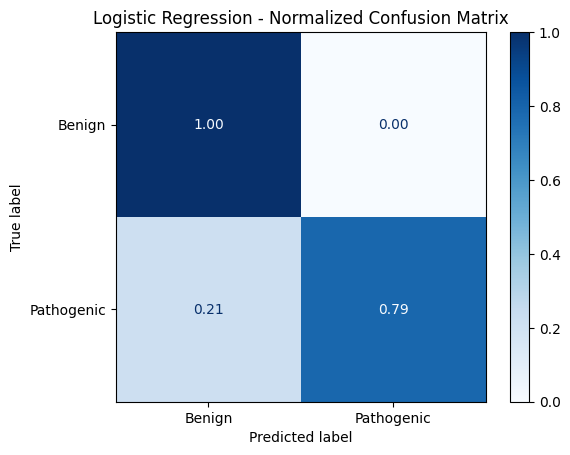

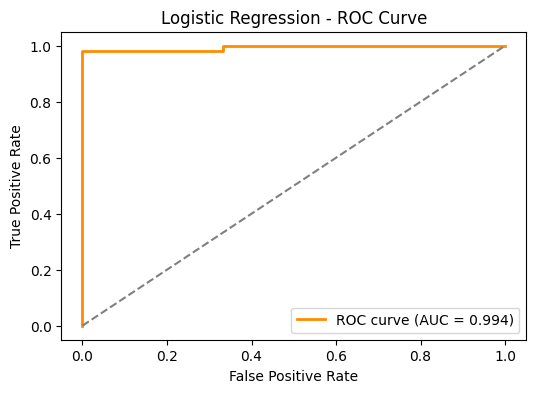

In [17]:
# === Logistic Regression Model for CFTR Variant Pathogenicity ===

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
ml_path = "/content/drive/MyDrive/FDS_project/data_processed/cftr_ml_table.csv"
df = pd.read_csv(ml_path)
df['Label'] = df['Label'].map({'Pathogenic': 1, 'Benign': 0})

# 2️⃣ Select features and target
feature_cols = ['norm_pos','blosum62','grantham','hydro_diff','charge_change','in_tm','in_domain']
X = df[feature_cols].astype(float)
y = df['Label'].astype(int)

# 3️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train class counts:", np.bincount(y_train))
print("Test class counts:", np.bincount(y_test))

# 4️⃣ Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5️⃣ Apply SMOTE to balance the classes in training set
sm = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print("After SMOTE class counts:", np.bincount(y_res))

# 6️⃣ Fit Logistic Regression
logreg = LogisticRegression(max_iter=500, class_weight=None, random_state=42)
logreg.fit(X_res, y_res)

# 7️⃣ Predict on test set
y_pred_class = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# 8️⃣ Evaluate performance
acc = accuracy_score(y_test, y_pred_class)
print(f"\nAccuracy: {acc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class, target_names=['Benign','Pathogenic']))

# 9️⃣ Confusion Matrix (normalized)
cm = confusion_matrix(y_test, y_pred_class, labels=[0,1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Pathogenic'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Logistic Regression - Normalized Confusion Matrix")
plt.show()

# 🔟 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.show()


Train class counts: [ 11 222]
Test class counts: [ 3 56]

Fitting Hard Voting ensemble...
Fitting Soft Voting ensemble...

Hard Voting Accuracy: 0.915
Classification report (Hard Voting):
              precision    recall  f1-score   support

      Benign       0.38      1.00      0.55         3
  Pathogenic       1.00      0.91      0.95        56

    accuracy                           0.92        59
   macro avg       0.69      0.96      0.75        59
weighted avg       0.97      0.92      0.93        59



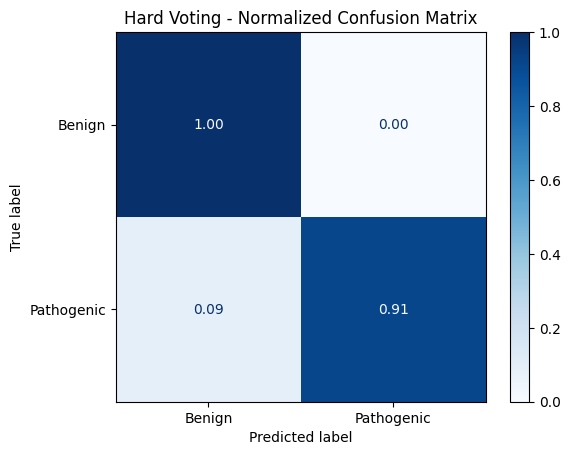


Soft Voting Accuracy: 0.915
Soft Voting ROC AUC: 0.952
Classification report (Soft Voting):
              precision    recall  f1-score   support

      Benign       0.33      0.67      0.44         3
  Pathogenic       0.98      0.93      0.95        56

    accuracy                           0.92        59
   macro avg       0.66      0.80      0.70        59
weighted avg       0.95      0.92      0.93        59



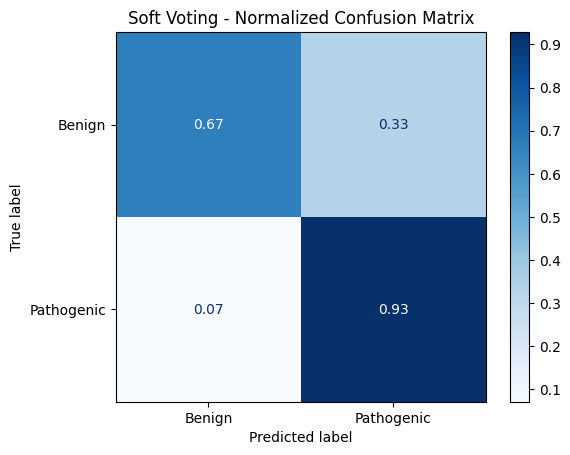

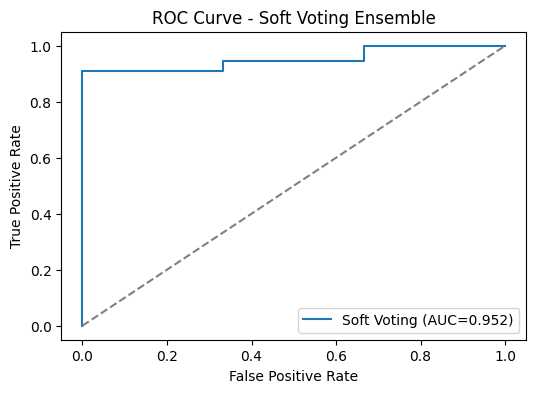

In [18]:
# === Voting Ensemble (Hard + Soft) with SMOTE pipeline ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# 1) Load dataset
ml_path = "/content/drive/MyDrive/FDS_project/data_processed/cftr_ml_table.csv"
df = pd.read_csv(ml_path)
df['Label'] = df['Label'].map({'Pathogenic':1, 'Benign':0})

feature_cols = ['norm_pos','blosum62','grantham','hydro_diff','charge_change','in_tm','in_domain']
X = df[feature_cols].astype(float)
y = df['Label'].astype(int)

# 2) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train class counts:", np.bincount(y_train))
print("Test class counts:", np.bincount(y_test))

# 3) Define base estimators
clf_lr = LogisticRegression(max_iter=500, random_state=42)
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
clf_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=5)

# 4) Voting ensembles
# For soft voting, all estimators must implement predict_proba (they do)
voting_hard = VotingClassifier(
    estimators=[('lr', clf_lr), ('dt', clf_dt), ('rf', clf_rf), ('knn', clf_knn)],
    voting='hard'
)
voting_soft = VotingClassifier(
    estimators=[('lr', clf_lr), ('dt', clf_dt), ('rf', clf_rf), ('knn', clf_knn)],
    voting='soft'
)

# 5) Pipeline: scaler -> SMOTE -> voting classifier
# We use imblearn Pipeline so SMOTE is applied inside fit (only to training data).
pipe_hard = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('voting', voting_hard)
])
pipe_soft = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('voting', voting_soft)
])

# 6) Fit both ensembles
print("\nFitting Hard Voting ensemble...")
pipe_hard.fit(X_train, y_train)

print("Fitting Soft Voting ensemble...")
pipe_soft.fit(X_train, y_train)

# 7) Predict & evaluate Hard voting
y_pred_hard = pipe_hard.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)
print(f"\nHard Voting Accuracy: {acc_hard:.3f}")
print("Classification report (Hard Voting):")
print(classification_report(y_test, y_pred_hard, target_names=['Benign','Pathogenic']))

cm_hard = confusion_matrix(y_test, y_pred_hard, labels=[0,1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_hard, display_labels=['Benign','Pathogenic'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Hard Voting - Normalized Confusion Matrix")
plt.show()

# 8) Predict & evaluate Soft voting (probabilities available)
y_pred_soft = pipe_soft.predict(X_test)
y_prob_soft = pipe_soft.predict_proba(X_test)[:, 1]
acc_soft = accuracy_score(y_test, y_pred_soft)
roc_auc_soft = auc(*roc_curve(y_test, y_prob_soft)[:2])
print(f"\nSoft Voting Accuracy: {acc_soft:.3f}")
print(f"Soft Voting ROC AUC: {roc_auc_soft:.3f}")
print("Classification report (Soft Voting):")
print(classification_report(y_test, y_pred_soft, target_names=['Benign','Pathogenic']))

cm_soft = confusion_matrix(y_test, y_pred_soft, labels=[0,1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_soft, display_labels=['Benign','Pathogenic'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Soft Voting - Normalized Confusion Matrix")
plt.show()

# 9) Plot ROC curve for soft voting
fpr, tpr, _ = roc_curve(y_test, y_prob_soft)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Soft Voting (AUC={roc_auc_soft:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Soft Voting Ensemble')
plt.legend()
plt.show()



Cross-validated accuracy scores: [0.88135593 0.91525424 0.86206897 0.96551724 0.94827586]
Mean accuracy: 0.9144944476914085

=== Random Forest Performance ===
Accuracy: 0.932
              precision    recall  f1-score   support

      Benign       0.40      0.67      0.50         3
  Pathogenic       0.98      0.95      0.96        56

    accuracy                           0.93        59
   macro avg       0.69      0.81      0.73        59
weighted avg       0.95      0.93      0.94        59



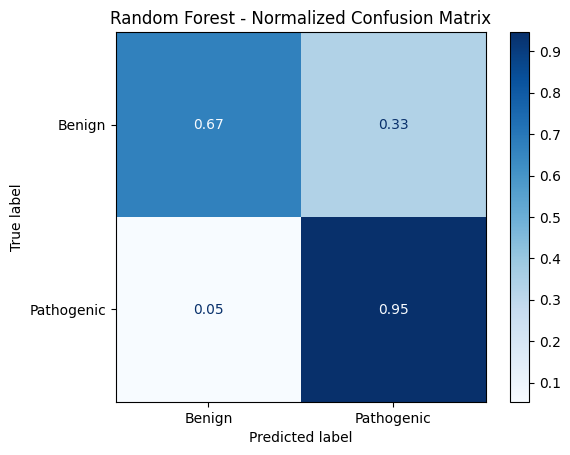

In [19]:
# === Random Forest Modeling and Feature Importance ===
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 1) Load dataset
ml_path = "/content/drive/MyDrive/FDS_project/data_processed/cftr_ml_table.csv"
df = pd.read_csv(ml_path)
df['Label'] = df['Label'].map({'Pathogenic':1, 'Benign':0})

# Define features and target
feature_cols = ['norm_pos','blosum62','grantham','hydro_diff','charge_change','in_tm','in_domain']
X = df[feature_cols]
y = df['Label']

# 2) Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3) Create SMOTE + RandomForest pipeline
smote = SMOTE(random_state=42, k_neighbors=3)
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    class_weight='balanced',
)

pipe = Pipeline([('smote', smote), ('rf', rf)])

# 4) Cross-validation (Accuracy)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy') # Changed scoring to accuracy
print("Cross-validated accuracy scores:", cv_scores) # Changed print statement
print("Mean accuracy:", np.mean(cv_scores)) # Changed print statement

# 5) Fit final model on full training data (with SMOTE)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# 6) Evaluate
print("\n=== Random Forest Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred, target_names=['Benign','Pathogenic']))

cm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Pathogenic'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Random Forest - Normalized Confusion Matrix")
plt.show()

Train class counts: [ 11 222]
Test class counts: [ 3 56]
After SMOTE train class counts: [222 222]

Regression fit metrics on TEST set:
R² Score: -2.012
RMSE: 0.381
Predicted score range: 0.053 to 1.351

ROC AUC: 0.988
Optimal threshold (Youden's J): 0.283

-- Using default threshold 0.5 --
Accuracy: 0.729
              precision    recall  f1-score   support

      Benign       0.16      1.00      0.27         3
  Pathogenic       1.00      0.71      0.83        56

    accuracy                           0.73        59
   macro avg       0.58      0.86      0.55        59
weighted avg       0.96      0.73      0.80        59


-- Using optimal threshold (Youden) --
Accuracy: 0.983
              precision    recall  f1-score   support

      Benign       0.75      1.00      0.86         3
  Pathogenic       1.00      0.98      0.99        56

    accuracy                           0.98        59
   macro avg       0.88      0.99      0.92        59
weighted avg       0.99      0.98    

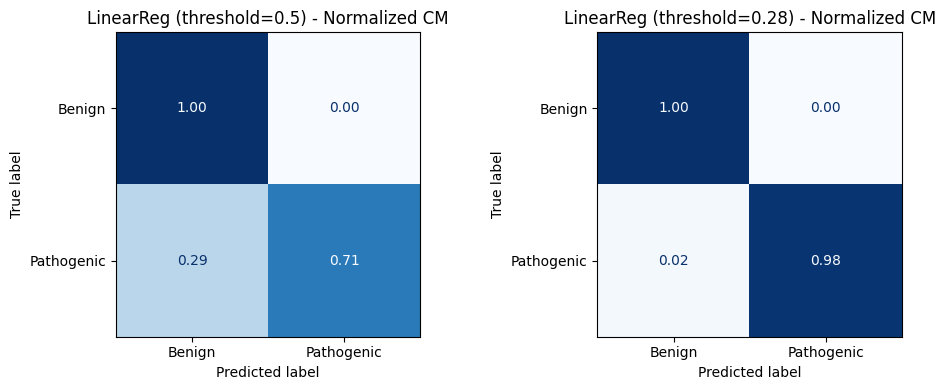

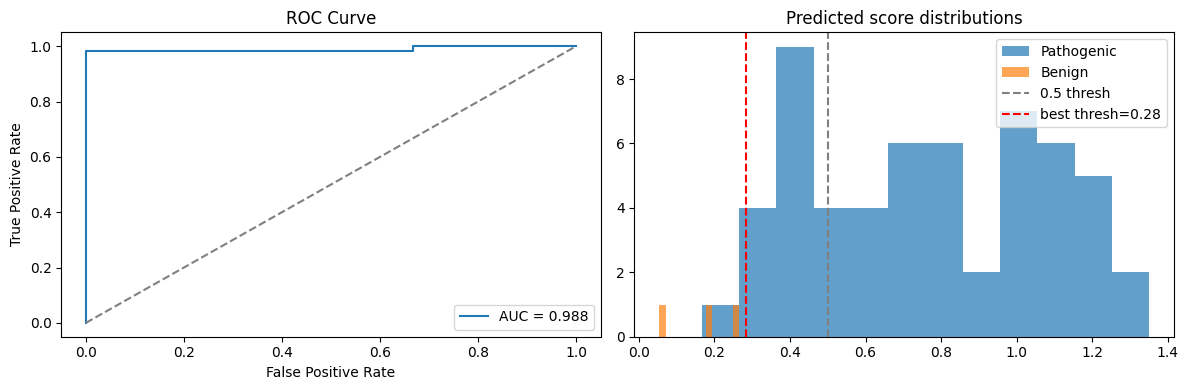

In [20]:
# === Balanced Linear Regression with SMOTE + threshold tuning (Colab-ready) ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# 1) Load dataset
ml_path = "/content/drive/MyDrive/FDS_project/data_processed/cftr_ml_table.csv"
df = pd.read_csv(ml_path)
df['Label'] = df['Label'].map({'Pathogenic':1, 'Benign':0})

# 2) Features / target
feature_cols = ['norm_pos','blosum62','grantham','hydro_diff','charge_change','in_tm','in_domain']
X = df[feature_cols].astype(float)
y = df['Label'].astype(int)

# 3) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train class counts:", np.bincount(y_train))
print("Test class counts:", np.bincount(y_test))

# 4) Scale features BEFORE SMOTE (important for distance-based SMOTE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5) Apply SMOTE on the scaled training set
sm = SMOTE(random_state=42, k_neighbors=3)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print("After SMOTE train class counts:", np.bincount(y_res))

# 6) Fit Linear Regression on balanced (resampled) training data
linreg = LinearRegression()
linreg.fit(X_res, y_res)

# 7) Predict continuous pathogenicity scores on test set
y_pred_score = linreg.predict(X_test_scaled)

# 8) Regression metrics (continuous)
r2 = r2_score(y_test, y_pred_score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_score))
print(f"\nRegression fit metrics on TEST set:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Predicted score range: {y_pred_score.min():.3f} to {y_pred_score.max():.3f}")

# 9) Find optimal threshold from ROC (Youden's J = tpr - fpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
j_scores = tpr - fpr
best_idx = np.nanargmax(j_scores)
best_thresh = thresholds[best_idx]
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.3f}")
print(f"Optimal threshold (Youden's J): {best_thresh:.3f}")

# 10) Apply threshold -> classification
y_pred_class_default = (y_pred_score >= 0.5).astype(int)
y_pred_class_opt = (y_pred_score >= best_thresh).astype(int)

# 11) Print classification summaries
print("\n-- Using default threshold 0.5 --")
print("Accuracy:", round(accuracy_score(y_test, y_pred_class_default), 3))
print(classification_report(y_test, y_pred_class_default, target_names=['Benign','Pathogenic']))

print("\n-- Using optimal threshold (Youden) --")
print("Accuracy:", round(accuracy_score(y_test, y_pred_class_opt), 3))
print(classification_report(y_test, y_pred_class_opt, target_names=['Benign','Pathogenic']))

# 12) Confusion matrices (normalized)
cm_def = confusion_matrix(y_test, y_pred_class_default, labels=[0,1], normalize='true')
cm_opt = confusion_matrix(y_test, y_pred_class_opt, labels=[0,1], normalize='true')

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_def, display_labels=['Benign','Pathogenic'])
disp1.plot(cmap='Blues', values_format=".2f", ax=plt.gca(), colorbar=False)
plt.title("LinearReg (threshold=0.5) - Normalized CM")

plt.subplot(1,2,2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_opt, display_labels=['Benign','Pathogenic'])
disp2.plot(cmap='Blues', values_format=".2f", ax=plt.gca(), colorbar=False)
plt.title(f"LinearReg (threshold={best_thresh:.2f}) - Normalized CM")
plt.tight_layout()
plt.show()

# 13) ROC curve + predicted score distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1,2,2)
plt.hist(y_pred_score[y_test==1], bins=12, alpha=0.7, label='Pathogenic')
plt.hist(y_pred_score[y_test==0], bins=12, alpha=0.7, label='Benign')
plt.axvline(0.5, color='gray', linestyle='--', label='0.5 thresh')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'best thresh={best_thresh:.2f}')
plt.legend()
plt.title("Predicted score distributions")
plt.tight_layout()
plt.show()


=== Feature Importance Table ===
         Feature  Importance
1       blosum62    0.310944
0       norm_pos    0.230361
2       grantham    0.226948
3     hydro_diff    0.144130
4  charge_change    0.087617
5          in_tm    0.000000
6      in_domain    0.000000


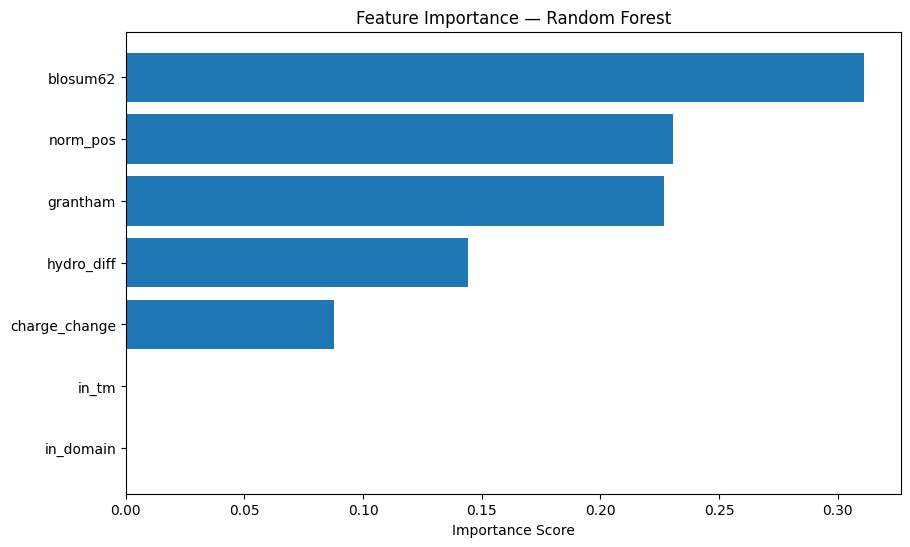

In [21]:
# Extract the trained Random Forest from pipeline
rf_model = pipe.named_steps['rf']

importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create importance table
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("=== Feature Importance Table ===")
print(feat_df)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance — Random Forest")
plt.xlabel("Importance Score")
plt.show()



AdaBoost CV Accuracy: [0.89830508 0.93220339 0.82758621 0.96551724 0.93103448]
Mean: 0.9109292811221508

=== AdaBoost Performance ===
Accuracy: 0.949
              precision    recall  f1-score   support

      Benign       0.50      0.67      0.57         3
  Pathogenic       0.98      0.96      0.97        56

    accuracy                           0.95        59
   macro avg       0.74      0.82      0.77        59
weighted avg       0.96      0.95      0.95        59



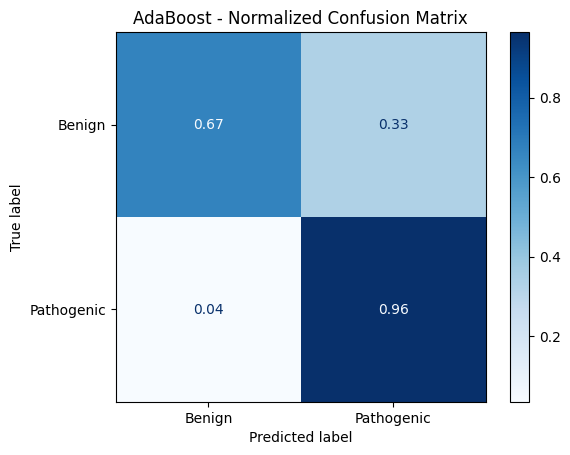

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Train-test split already done earlier; if not, do it again:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
#                                                     random_state=42, stratify=y)

smote = SMOTE(random_state=42, k_neighbors=3)

ada = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.8,
    random_state=42
)

ada_pipe = Pipeline([('smote', smote), ('ada', ada)])

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ada_pipe, X, y, cv=skf, scoring='accuracy')
print("AdaBoost CV Accuracy:", cv_scores)
print("Mean:", np.mean(cv_scores))

# Train and evaluate
ada_pipe.fit(X_train, y_train)
y_pred_ada = ada_pipe.predict(X_test)

print("\n=== AdaBoost Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada), 3))
print(classification_report(y_test, y_pred_ada, target_names=['Benign','Pathogenic']))

cm = confusion_matrix(y_test, y_pred_ada, labels=[0,1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Pathogenic'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("AdaBoost - Normalized Confusion Matrix")
plt.show()


In [23]:
!pip install xgboost


XGBoost CV Accuracy: [0.88135593 0.96610169 0.87931034 0.98275862 0.9137931 ]
Mean: 0.9246639392168323

=== XGBoost Performance ===
Accuracy: 0.966
              precision    recall  f1-score   support

      Benign       0.67      0.67      0.67         3
  Pathogenic       0.98      0.98      0.98        56

    accuracy                           0.97        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.97      0.97      0.97        59



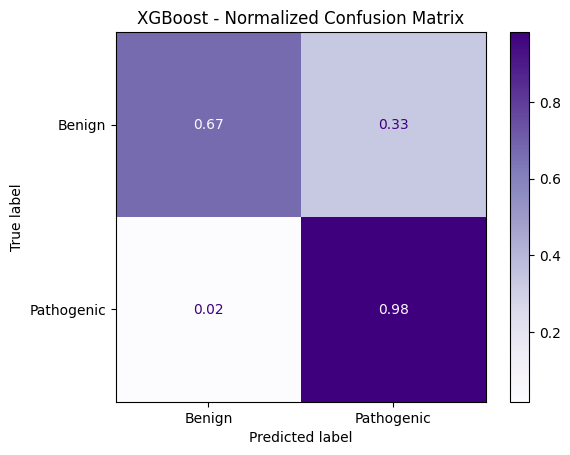

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42, k_neighbors=3)

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    random_state=42,
    eval_metric='logloss'
)

xgb_pipe = Pipeline([('smote', smote), ('xgb', xgb)])

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_pipe, X, y, cv=skf, scoring='accuracy')
print("XGBoost CV Accuracy:", cv_scores)
print("Mean:", np.mean(cv_scores))

# Train and evaluate
xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)

print("\n=== XGBoost Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))
print(classification_report(y_test, y_pred_xgb, target_names=['Benign','Pathogenic']))

cm = confusion_matrix(y_test, y_pred_xgb, labels=[0,1], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Pathogenic'])
disp.plot(cmap='Purples', values_format=".2f")
plt.title("XGBoost - Normalized Confusion Matrix")
plt.show()
